<div style="text-align: center; font-size: 46px; color: blue;">
    <u><b>13.EDA2</b></u>
</div>

<div style="text-align: center; font-size: 30px; color: Violet;">
    <u><b>Data Preprocessing and Feature Engineering in Machine Learning</b></u>
</div>

## Objective:

This assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial for building efficient machine learning models. You will work with a provided dataset to apply various techniques such as scaling, encoding, and feature selection methods including isolation forest and PPS score analysis.


In [44]:
#Import Libraries
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import mutual_info_classif

import matplotlib.pyplot as plt
import seaborn as sns


In [45]:
#1.Load Dataset
df=pd.read_csv("adult_with_headers.csv")

In [46]:
#2.Data Exploration
print(df.head())
print(df.info())
print(df.describe(include="all"))

   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   United-States   <=50

In [47]:
#3.Handle missing value

#Replace "?" with NaN

df.replace('?',np.nan, inplace=True)

#Identify numerical and categorical columns
num_cols=df.select_dtypes(include=['int64','float64']).columns
cat_cols=df.select_dtypes(include=['object']).columns

#Fill missing values
df[num_cols]=df[num_cols].fillna(df[num_cols].median())
df[cat_cols]=df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


In [48]:
#4.Scaling Techniques
#Satndard Scaling

standard_scaler=StandardScaler()
df_standard=df.copy()
df_standard[num_cols]=standard_scaler.fit_transform(df[num_cols])


In [49]:
#Min-Max Scaling
minmax_scaler=MinMaxScaler()
df_minmax=df.copy()
df_minmax[num_cols]=minmax_scaler.fit_transform(df[num_cols])

In [50]:
#5.Encoding Techniques
#Low & High cardinality categorical columns

low_cardinality=[col for col in cat_cols if df[col].nunique() < 5]
high_cardinality=[col for col in cat_cols if df[col].nunique() >= 5]

#One Hot Encoding for low cardinality
df=pd.get_dummies(df,columns=low_cardinality,drop_first=True)


In [51]:
#Label Encoding for high cardinality
le=LabelEncoder()
for col in high_cardinality:
    df[col]=le.fit_transform(df[col])
    

In [52]:
#6.feature Engineering
#New Feature 1: Capital difference
df['capital_diff']=df['capital_gain'] - df['capital_loss']


In [53]:
#New Feature 2: Annual Working Hours
df['hours_per_year']=df['hours_per_week'] * 52

In [54]:
#Log Transforamtion for skewed feature
df['capital_gain_log']=np.log1p(df['capital_gain'])

In [55]:
#7.Feature Selection - Outlier Removal
iso=IsolationForest(contamination=0.05,random_state=42)
outliers=iso.fit_predict(df[num_cols])

df['outlier']=outliers
df_clean=df[df['outlier']==1].drop(columns=['outlier'])


In [56]:
#8.Feature Relationship (Mutual Information)
x=df_clean.drop('income_ >50K',axis=1)
y=df_clean['income_ >50K']

In [57]:
mi_scores=mutual_info_classif(x,y,random_state=42)

In [58]:
mi_df=pd.DataFrame({'Feature':x.columns,'Mutual_Information_Score':mi_scores}).sort_values(by='Mutual_Information_Score',ascending=False)

In [59]:
print("\nTop Features based on Mutual Inforamtion:")
print( mi_df.head(10))


Top Features based on Mutual Inforamtion:
             Feature  Mutual_Information_Score
5     marital_status                  0.109100
7       relationship                  0.108320
14      capital_diff                  0.084153
16  capital_gain_log                  0.075202
9       capital_gain                  0.071518
0                age                  0.064726
6         occupation                  0.057264
3          education                  0.055387
4      education_num                  0.054777
15    hours_per_year                  0.037431


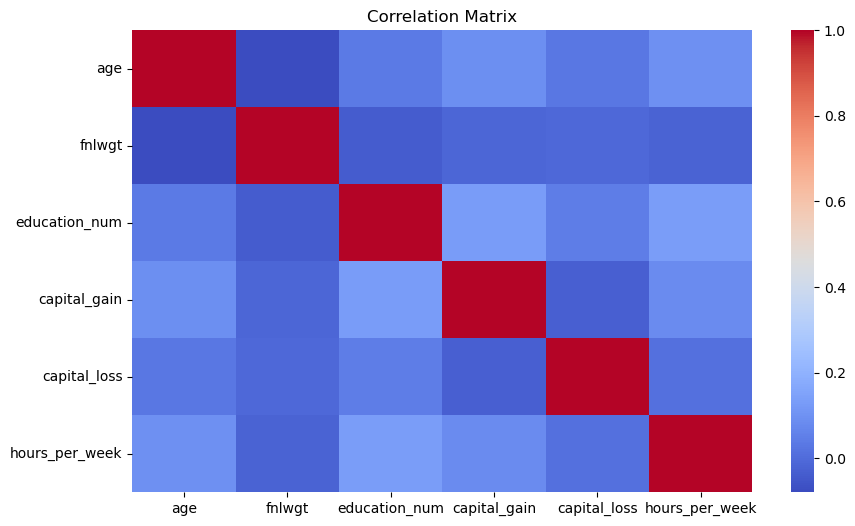

Fianl dataset shape: (30933, 18)


In [60]:
#9.Correlation Matrix
plt.figure(figsize=(10,6))
sns.heatmap(df_clean[num_cols].corr(),cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

print("Fianl dataset shape:", df_clean.shape)